## Midterm Assignemnt - Data Visualization with Pandas 

#### Adam Hipp  --> ahipp2@uncc.edu

#### 1. Generate plots (use sort() and head() to make visualizations of most affected regions)

In [503]:
import pandas as pd
#import matplotlib.pyplot as plt

confirmed = pd.read_csv("time_series_19-covid-Confirmed(1).csv")
deaths =    pd.read_csv("time_series_19-covid-Deaths.csv", index_col = "Country/Region")
recovered = pd.read_csv("time_series_19-covid-Recovered.csv")


#### a. area map of deaths by country within last 8 days

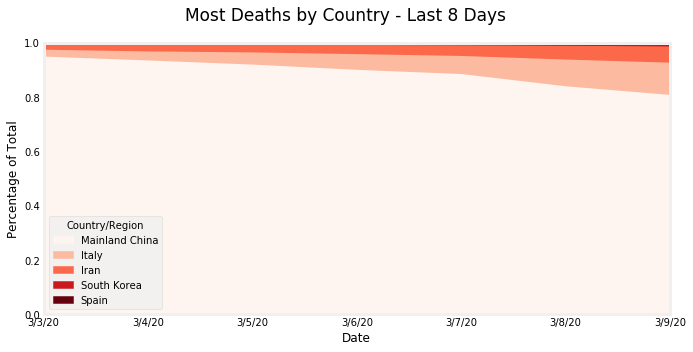

In [659]:

deaths_by_country = deaths.iloc[:,4:53].groupby("Country/Region").sum()
deaths_by_country.sort_values(by="3/9/20", ascending=False, inplace=True)


top_deaths = deaths_by_country.head().T
top_deaths = top_deaths.reset_index().loc[40:47]
top_deaths = top_deaths.set_index("index")
total_deaths = top_deaths.sum(axis="columns")
total_deaths

deaths_map = top_deaths.div(total_deaths, axis="index")
plt = deaths_map.plot(kind="area", figsize=(10,5), cmap="Reds", ylim=(0,1))
plt.figure.suptitle("Most Deaths by Country - Last 8 Days", fontsize=17)
plt.set_xlabel("Date", fontsize=12)
plt.set_ylabel("Percentage of Total", fontsize=12)
plt










#### b. line graph of deaths by US state

C:\Users\adamh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


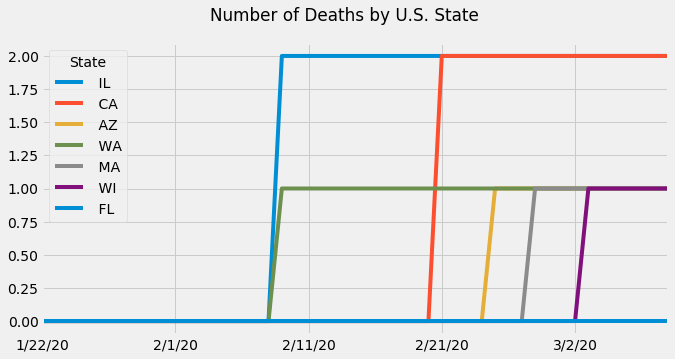

In [500]:
deaths_US = deaths[deaths["Country/Region"]=="US"]
deaths_US

deaths_US["State"] = deaths_US["Province/State"].str.split(",",n=2,expand=True)[1]
deaths_US_state = deaths_US.iloc[:,4:53].groupby("State").sum()
deaths_US_state.sort_values(by="3/9/20",ascending=False,inplace=True)

deaths_US_state
plt = deaths_US_state.head(7).T.plot(figsize=(10,5))
plt.figure.suptitle("Number of Deaths by U.S. State")
plt

#### c. line graph of (confirmed cases - recovered) by US State

C:\Users\adamh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\adamh\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


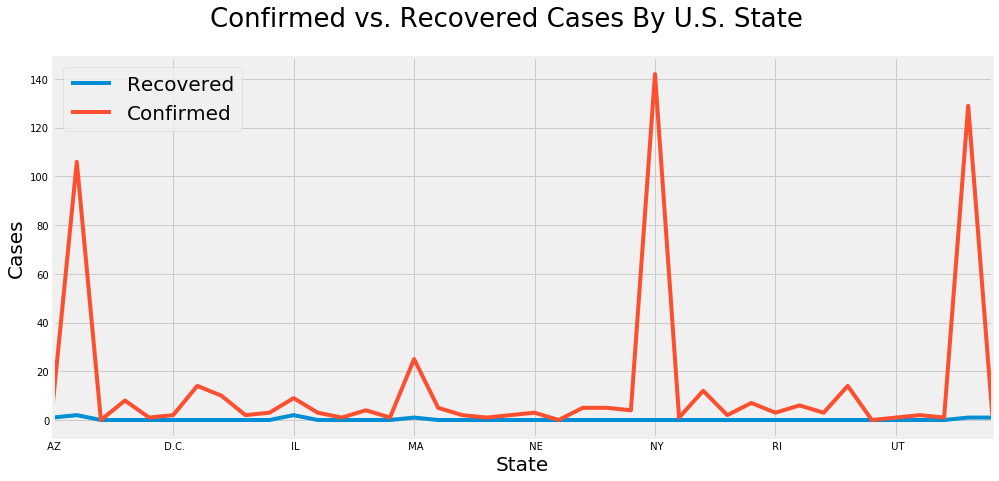

In [669]:
import matplotlib.pyplot as plt
import pandas as pd

###### Recovered cases by state

recovered = pd.read_csv("time_series_19-covid-Recovered.csv")
recovered_US = recovered[recovered["Country/Region"]=="US"]

# One line graph will show the states with most recovered cases
recovered_US["State"] = recovered_US["Province/State"].str.split(",",n=2,expand=True)[1]
recovered_US_state = recovered_US.iloc[:,4:53].groupby("State").sum()
recovered_US_state.sort_values(by="State", ascending=True, inplace=True)
top_recovered = recovered_US_state["3/9/20"]

# Create a Series of state names to use for x-axis 
temp = top_recovered.reset_index()
state_idx = temp["State"]

###### Confirmed cases by state
confirmed = pd.read_csv("time_series_19-covid-Confirmed(1).csv")
confirmed_US = confirmed[confirmed["Country/Region"]=="US"]

#Other line graph will show states with most confirmed cases
confirmed_US["State"] = confirmed_US["Province/State"].str.split(",",n=2,expand=True)[1]
confirmed_US_state = confirmed_US.iloc[:,4:53].groupby("State").sum()
confirmed_US_state.sort_values(by="State", ascending=True, inplace=True)
top_confirmed = confirmed_US_state["3/9/20"]

# Cast series for recovered, and confirmed values into list to be 
# converted to a dataframe

data_1 = list(top_recovered)
data_2 = list(top_confirmed)
data_3 = list(state_idx)


headers = ["Recovered","Confirmed"]

table_data = {"Recovered" : data_1,
             "Confirmed" : data_2,
             }

df = pd.DataFrame(table_data, columns=headers, index=data_3)
plt= df.plot.line(stacked=True, figsize=(15,7))
plt.figure.suptitle("Confirmed vs. Recovered Cases By U.S. State", fontsize=26)
plt.set_ylabel("Cases", fontsize = 20)
plt.set_xlabel("State", fontsize = 20)
plt.legend(fontsize = 20)
plt


### 2. Parsing the relevant table 

#### a. What the highest single day increase in confirmed cases by Country, and produce a line graph displaying this

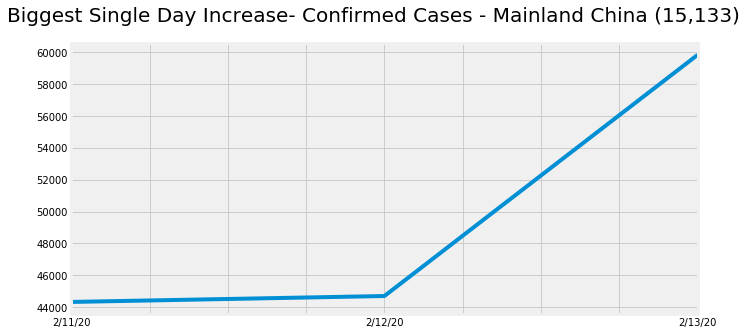

In [689]:
confirmed = pd.read_csv("time_series_19-covid-Confirmed(1).csv", index_col = "Country/Region")
confirmed_by_country = confirmed.iloc[:,4:53].groupby("Country/Region").sum()
top_confirmed = confirmed_by_country.sort_values(by="3/9/20", ascending=False)

# Get dataframe dimensions to run for loop
top_confirmed.shape         # 111 rows, 47 columns

# pos variable to store coordinate position of highest increase
# temp variable to store value to store increase from previous day
# most_confirmed variable to hold current highest single day increase
pos = ()
temp = 0
most_confirmed = 0

for x in range(111):
    for y in range(46):
        temp = top_confirmed.iloc[x,y+1] - top_confirmed.iloc[x,y]
        
        if temp > most_confirmed:
            most_confirmed = temp
            pos = (x,y,x,y+1)
            
# most_confirmed
# pos --> (0,21)
# top_confirmed.iloc[0,20:22]

plt = top_confirmed.iloc[0,19:22].plot.line(figsize=(10,5))
plt.figure.suptitle("Biggest Single Day Increase- Confirmed Cases - Mainland China (15,133)", fontsize=20)
plt

#### b. The highest single day increase in confirmed cases by US State, with a line graph displaying this 

C:\Users\adamh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


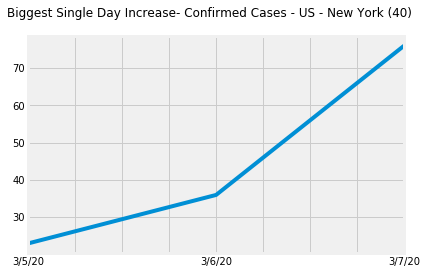

In [698]:
confirmed = pd.read_csv("time_series_19-covid-Confirmed(1).csv")

confirmed_US = confirmed[confirmed["Country/Region"]=="US"]

confirmed_US["State"] = confirmed_US["Province/State"].str.split(",",n=2,expand=True)[1]
confirmed_US_state = confirmed_US.iloc[:,4:53].groupby("State").sum()
confirmed_US_state.sort_values(by="3/9/20",ascending=False,inplace=True)

# Get dataframe dimensions to run for loop
confirmed_US_state.shape   # (40,48)

# pos variable to store coordinate position of highest increase
# temp variable to store value to store increase from previous day
# most_confirmed variable to hold current highest single day increase
# Iterate through each cell, subtracting the previous row 
pos = ()
temp = 0
most_confirmed = 0
for x in range(40):
    for y in range(47):
        temp = confirmed_US_state.iloc[x,y+1] - confirmed_US_state.iloc[x,y]
        
        if temp > most_confirmed:
            most_confirmed = temp
            pos = (x,y,x,y+1)
            
# used these variables to logic check the for loop
# most_confirmed 
# pos  (0,44) to (0,45)
#confirmed_US_state.iloc[0,43:46]

plt = confirmed_US_state.iloc[0,43:46].plot.line()
plt.figure.suptitle("Biggest Single Day Increase- Confirmed Cases - US - New York (40)")
plt

### Extra Credit -
#### Stacked Bar Graph - Comparing countries with the most confirmed cases with how many deaths they recorded. 

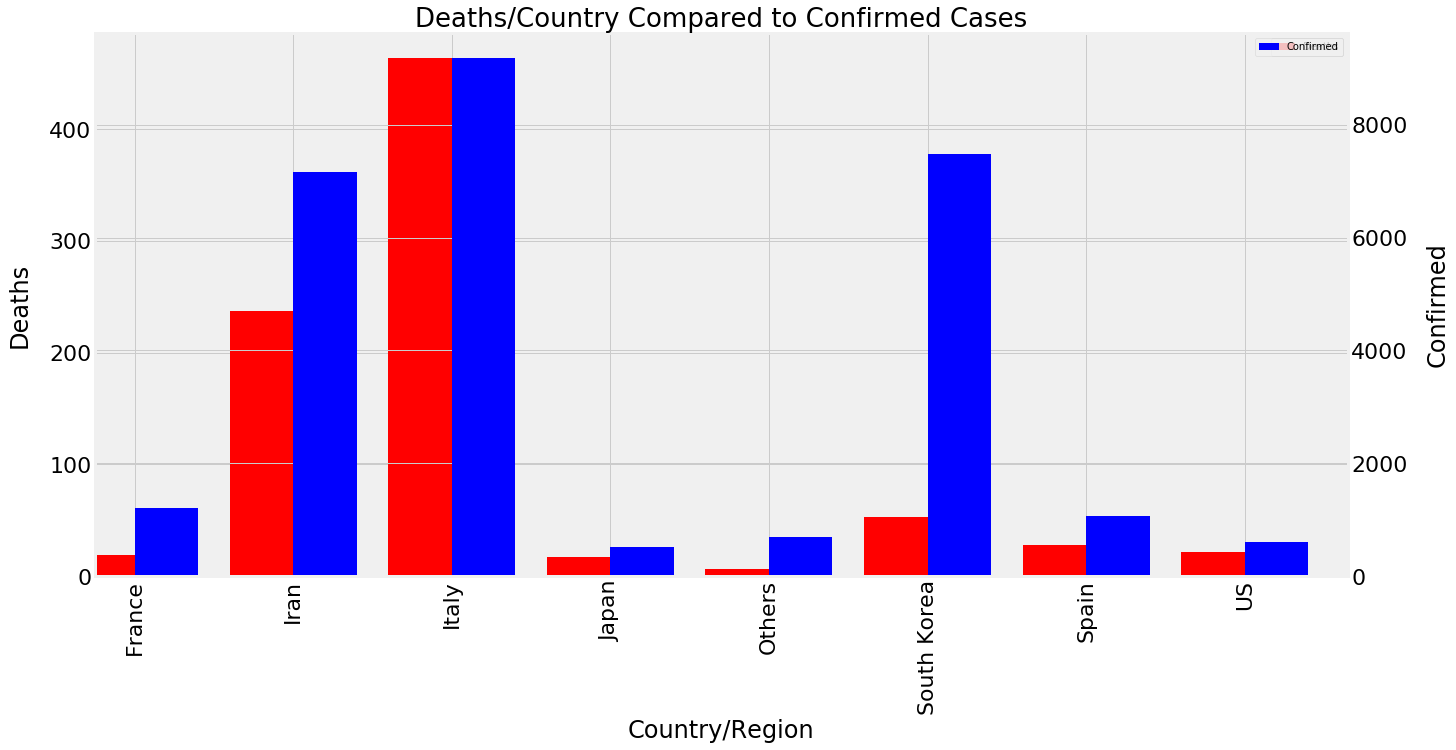

In [679]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


###### Cases resulting in death by country - excluding China ######
deaths =    pd.read_csv("time_series_19-covid-Deaths.csv", index_col = "Country/Region")

deaths_by_country = deaths.iloc[:,4:53].groupby("Country/Region").sum()
deaths_by_country.sort_values(by="3/9/20", ascending=False, inplace=True)

# Consider the top countries, minus China 
# China's numbers minimize the other country's statistics
# Alphabetize the results so they can be compared side by side
top_deaths = deaths_by_country.head(9)
top_deaths_1 = top_deaths.drop(axis=0, labels="Mainland China")
deaths_sorted = top_deaths_1.sort_values(by="Country/Region",axis=0, ascending=True)
deaths_sorted_1 = deaths_sorted.reset_index()

#Make an index of countries present in both dataframes for comparison
country_idx = deaths_sorted_1["Country/Region"]


###### Confirmed cases by country #####
confirmed =    pd.read_csv("time_series_19-covid-Confirmed(1).csv", index_col = "Country/Region")

confirmed_by_country = confirmed.iloc[:,4:53].groupby("Country/Region").sum()
confirmed_by_country.sort_values(by="3/9/20", ascending=False, inplace=True)

# Filter for countries that are found in the dataframe of cases leading to death
# Remove Germany and China not in other list. Filter these out to make list identical
top_confirmed = confirmed_by_country.head(10)
top_confirmed_1 = top_confirmed.drop(axis=0, labels=["Germany","Mainland China"])
confirmed_sorted = top_confirmed_1.sort_values(by="Country/Region", axis=0, ascending=True)


# Prepare the table data for deaths and confirmed results to be put into a dataframe
most_deaths_sorted = deaths_sorted["3/9/20"]
most_confirmed_sorted = confirmed_sorted["3/9/20"]

death_data = {"Deaths" : most_deaths_sorted
             }

confirmed_data = {"Confirmed": most_confirmed_sorted
                 }

#Build the dataframe for Death and Confirmed Cases Using State names as index
df_1 = pd.DataFrame(death_data, index=country_idx)
df_2 = pd.DataFrame(confirmed_data, index=country_idx)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
ax2 = ax.twinx()
width = 0.4

df_1.plot(kind='bar',color='red', ax=ax, width=width, position=1)
df_2.plot(kind='bar',color='blue', ax=ax2, width=width, position=0)
ax.set_xlabel("Country/Region", fontsize=24)
ax.tick_params(axis='both', labelsize=22)
ax.set_ylabel('Deaths', fontsize=24, labelpad=18)
ax2.set_ylabel('Confirmed', fontsize=24, labelpad=18)
plt.title("Deaths/Country Compared to Confirmed Cases", fontsize =26)
plt.tick_params(axis='both', labelsize=22)
plt.show()
